# Feature Selection Tutorial

## 1. Introduction to Feature Selection

## 2. Introduction to Lasso

## 3. Variants of Lasso

## 4. References
1. Guyon, Isabelle, and André Elisseeff. "An introduction to variable and feature selection." Journal of machine learning research 3.Mar (2003): 1157-1182. [link](http://www.jmlr.org/papers/volume3/guyon03a/guyon03a.pdf)
* Feature selection - Wikipedia. [link](https://en.wikipedia.org/wiki/Feature_selection)

* Sklearn [link](http://scikit-learn.org/stable/modules/feature_selection.html#randomized-l1)
* F. Bach, Model-Consistent Sparse Estimation through the Bootstrap. [link]( https://hal.inria.fr/hal-00354771/)
* N. Meinshausen, P. Buhlmann, Stability selection, Journal of the Royal Statistical Society, 72 (2010)[link](http://arxiv.org/pdf/0809.2932.pdf)
* http://stats.stackexchange.com/questions/45643/why-l1-norm-for-sparse-models
* UCI Machine Learning Repository [link](http://archive.ics.uci.edu/ml/index.html)
* http://blog.datadive.net/selecting-good-features-part-ii-linear-models-and-regularization/

## Experiment Design
### Lasso
* Dataset: synthetic examples, UCL ML dataset (regression, classification)
    * y = x_0 + 0.5 x_1 + 0 * x_2 + noise
    * y = x_0 + x_0 + noise
* Regression path (different lambda/alpha)
    * How will the weight/coefficient (same scale?) for each feature change with the lambda/alpha, @M2009 figure 1,4,7
* Performance:
    * How many features remain (relevent/irrelevent)
    * Task performance


### Bolasso & Bolasso-S


In [93]:
import matplotlib
import matplotlib.pyplot as plt 

import numpy as np

from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso, LinearRegression, lasso_path

%matplotlib inline 

In [100]:
def plot_reg_path(alphas, coefs, f, log_x=False):
    print alphas.shape, coefs.shape
    for i in range(coefs.shape[0]):
        plt.plot(alphas, coefs[i,:], label=f[i])
        if log_x:
            plt.xscale('log')
    plt.legend()
    plt.show()

def plot_lasso_reg_path(X, y, alphas, f, log_x=False):
    alphas, coef_path, _ = lasso_path(X, y, alphas=alphas)
    plot_reg_path(alphas, coef_path, f, log_x)

[ 1.12608333  0.80948128  0.90949936  0.87287791]
[ 0.         -0.          1.47777778  0.        ]
[ 0.   0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9]
(10,) (4, 10)


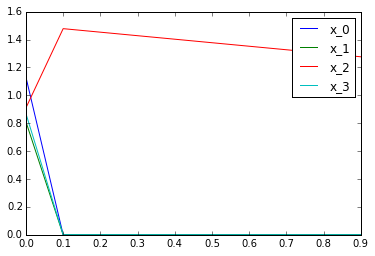

In [113]:
np.random.seed(1)

# Exp 1
n_data = 5000
noise = np.random.normal(0, 1, n_data)
x_seed = np.random.normal(0, 1, n_data)
x_0 = 1 * x_seed + np.random.normal(0, 0.1, n_data)
x_1 = -1 * x_seed + np.random.normal(0, 0.1, n_data)
x_2 = 2 * x_seed + np.random.normal(0, 0.1, n_data)
x_3 = 1 * x_seed + np.random.normal(0, 0.1, n_data)

X = np.array([x_0, x_1, x_2, x_3]).T

y = np.sum(X, axis=1) + noise
# y = X[:,0] + X[:,1] + X[:,2] + noise

lr = LinearRegression()
lr.fit(X, y)
print lr.coef_

lr = Lasso(alpha=0.1)
lr.fit(X, y)
print lr.coef_

# plot reg path for lasso on exp 1
alphas = np.arange(0.0, 1.0, 0.1)
# alphas = np.logspace(0.0,0.1,10)
print alphas
plot_lasso_reg_path(X, y, alphas, ['x_0', 'x_1', 'x_2', 'x_3'])